In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [2]:
# load the data
behavioral = pd.read_csv("data/Behavioral/AllData.csv")
# eeg_average = pd.read_csv("data/EEG/resting_eeg_average.csv")
# eeg_channels = pd.read_csv("data/EEG/resting_eeg_channels.csv")
# eeg_clusters = pd.read_csv("data/EEG/resting_eeg_clusters.csv")

# general info
shape = behavioral.shape  #2096, 7042
print(shape)
behavioral.count()
behavioral['DX_01_Cat'].nunique()  # 16 different categories in DX_01_Cat

/Users/alestolfo/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (66,68,80,81,82,83,84,95,96,97,98,99,110,111,112,113,114,125,126,127,128,129,140,141,142,144,155,156,157,159,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,109

(2096, 7042)


16

In [3]:
behavioral['DX_01_Cat'].unique()

array(['Anxiety Disorders', 'Depressive Disorders',
       'Neurodevelopmental Disorders',
       'No Diagnosis Given: Incomplete Eval', 'No Diagnosis Given',
       'Trauma and Stressor Related Disorders', 'Disruptive',
       'Substance Related and Addictive Disorders',
       'Other Conditions That May Be a Focus of Clinical Attention',
       'Gender Dysphoria', 'Elimination Disorders',
       'Bipolar and Related Disorders',
       'Obsessive Compulsive and Related Disorders', nan,
       'Schizophrenia Spectrum and other Psychotic Disorders',
       'Neurocognitive Disorders',
       'Disruptive, Impulse Control and Conduct Disorders'], dtype=object)

In [5]:
# remove all first columns and labels, except from sex, age, study-site and major disturb cathegory
first_cols = behavioral.iloc[:, :170]
behavioral = behavioral.iloc[:, 170:]
# list(first_cols.columns.values)
behavioral = behavioral.join(first_cols[['Sex', 'Age', 'Study.Site', 'DX_01_Cat']])

In [6]:
# remove observations with no label for DX_01_Cat
behavioral = behavioral.dropna(subset=['DX_01_Cat'])
behavioral.shape

(2092, 6876)

In [7]:
# shuffle the rows
behavioral = behavioral.sample(frac=1)

# separate labels from features
labels = behavioral[['DX_01_Cat']]
behavioral = behavioral.drop(['DX_01_Cat'], axis=1)
# at this point behavioral.shape = (1402, 6875)

In [8]:
# remove cathegorical variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
behavioral = behavioral.select_dtypes(include=numerics)          # behavioral.shape = (1402, 5731)

# check total number of NA values
behavioral.isna().sum().sum()

8263471

In [9]:
# convert to numpy arrays
behavioral_arr = np.array(behavioral)
labels = np.array(labels)

In [10]:
# replace NA with mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
behavioral_arr = imp.fit_transform(behavioral_arr)  
# verify no more NA
np.isnan(behavioral_arr).sum()       # 0

0

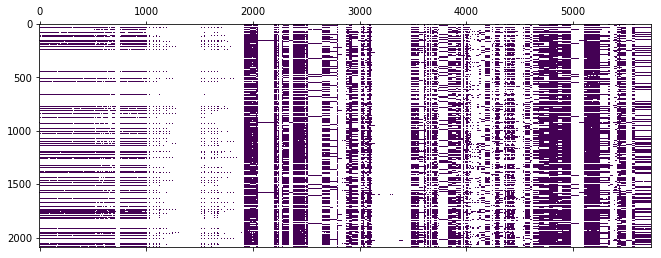

In [12]:
corr_matrix = pd.DataFrame(behavioral)
plt.matshow(corr_matrix)
plt.show()

In [13]:
behavioral.corr()

,Days_Baseline,ACE_01,ACE_02,ACE_03,ACE_04,ACE_05,ACE_06,ACE_07,ACE_08,ACE_09,...,YSR_Ext_T,YSR_Int,YSR_Int_T,YSR_OP,YSR_C,YSR_Total,YSR_Total_T,Sex,Age,Study.Site
Days_Baseline,1.000000,0.184908,0.126451,0.029201,0.154066,0.012689,-0.010399,-0.028593,-0.003449,0.164101,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.100136,-0.177267,0.250192
ACE_01,0.184908,1.000000,0.533872,0.177920,0.138445,0.346944,-0.036919,0.346944,0.090784,0.247565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160128,-0.077369,0.256815
ACE_02,0.126451,0.533872,1.000000,0.113402,0.423559,0.544331,-0.023531,0.113402,0.424334,0.157792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.295980,0.076174,-0.016234
ACE_03,0.029201,0.177920,0.113402,1.000000,0.048033,0.296296,0.048033,-0.055556,-0.088192,0.027608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266667,-0.081990,0.326947
ACE_04,0.154066,0.138445,0.423559,0.048033,1.000000,0.230556,0.053156,-0.134491,0.283212,0.187772,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.317015,0.025608,-0.079454
ACE_05,0.012689,0.346944,0.544331,0.296296,0.230556,1.000000,0.048033,-0.055556,0.390563,0.202458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266667,0.184138,0.159056
ACE_06,-0.010399,-0.036919,-0.023531,0.048033,0.053156,0.048033,1.000000,0.048033,0.159034,0.187772,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.152743,0.024534,0.094734
ACE_07,-0.028593,0.346944,0.113402,-0.055556,-0.134491,-0.055556,0.048033,1.000000,0.151186,0.202458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266667,0.113222,0.075110
ACE_08,-0.003449,0.090784,0.424334,-0.088192,0.283212,0.390563,0.159034,0.151186,1.000000,0.242087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.315600,0.273653,0.062121
ACE_09,0.164101,0.247565,0.157792,0.027608,0.187772,0.202458,0.187772,0.202458,0.242087,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.155985,0.238330,-0.009514


In [13]:
# keep about 30% for test set
n = np.int(behavioral_arr.shape[0]*0.33)
behavioral_test = behavioral_arr[:n,:]
behavioral_arr = behavioral_arr[n:,:]
labels = labels[n:,:]
labels_test = labels[:n,:]
labels = np.reshape(labels, [labels.shape[0],])
labels_test = np.reshape(labels_test, [labels_test.shape[0],])

In [15]:
# try random-forest classifier
clf = RandomForestClassifier(n_estimators=2000, max_depth = 1000, criterion='gini',
                             min_samples_split= 0.65, min_samples_leaf=0.15,
                             max_features = 500, oob_score = True, n_jobs = -1,
                             random_state =50, verbose = 1)
clf = clf.fit(behavioral_arr, labels)
predictions = clf.predict(behavioral_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Do

In [17]:
# estimate test error with CV
cv_score = cross_val_score(clf, behavioral_arr, labels, cv=10)
estimated_error = np.mean(cv_score)
estimated_error

# compute accuracy on our test split
vect = (predictions == labels_test)*1
accuracy = sum(vect) / predictions.shape[0]
accuracy

/Users/alestolfo/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[

0.572463768115942